In [2]:
# LeNet-5

# 합성곱과 다운 샘플링을 반복적으로 거치면서 마지막에 완전연결층에서 분류를 수행

In [3]:
%load_ext tensorboard

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as pt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

In [5]:
num_classes = 2

class LeNet(Sequential):
    
    def __init__(self, input_shape, nb_classes):
        
        super().__init__()
        
        self.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', input_shape = input_shape, padding = "same"))
        self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
        self.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), activation = 'relu', padding = "valid"))
        self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
        self.add(Flatten())
        self.add(Dense(120, activation = 'relu'))
        self.add(Dense(84, activation = 'relu'))
        self.add(Dense(nb_classes, activation = 'softmax'))
        
        self.compile(optimizer = 'adam', loss = categorical_crossentropy, metrics = ['accuracy'])

In [6]:
md = LeNet((100, 100, 3), num_classes)
md.summary()

Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 50, 50, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               1015800   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164

In [7]:
epochs = 100
batch = 32
img_h = 100
img_w = 100
t_dir = "./source/chap6/data/catanddog/train/"
v_dir = "./source/chap6/data/catanddog/validation/"

In [8]:
train = ImageDataGenerator(rescale = 1/255, rotation_range = 10, width_shift_range = 0.1, height_shift_range = 0.1,
                           shear_range = 0.1, zoom_range = 0.1)

train_g = train.flow_from_directory(t_dir, target_size = (img_h, img_w), color_mode = "rgb", batch_size = batch,
                                    seed = 1, shuffle = True, class_mode = "categorical")

valid = ImageDataGenerator(rescale = 1/255)

valid_g = valid.flow_from_directory(v_dir, target_size = (img_h, img_w), color_mode = "rgb", batch_size = batch,
                                    seed = 7, shuffle = True, class_mode = "categorical")

t_num = train_g.samples
v_num = valid_g.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [9]:
log_dir = "./LOG/1114_11"
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1, profile_batch = 0)
# callback이 정확도가 특정 임계치를 초과할때 저장된다.
# log_dir에 저장되고, histogram_freq이 1일때 매 에포크마다 출력을 히스토그램으로 기록.
# profile_batch가 1일때 두번째 배치부터 훈련이 진행되는 시간 및 시스템자원 등에 대한 사용을 관리하고 계산한다.

md.fit(train_g, epochs = epochs, steps_per_epoch = t_num // batch, validation_data = valid_g, validation_steps = v_num // batch,
        callbacks = [tensor_callback], verbose = 1)
# step_per_epoch = 한 에포크에서 사용하는 스텝( 모델이 가진 가중치를 1회 업데이트 하는 것 ) 개수를 지정.
# validation_steps = 에포크가 종료될 때 사용되는 테스트 스텝 개수 지정.
# callbacks = callback을 해당 위치에 저장한다.

# tensorboard --logdir={logdir}
# 프롬프트에 위의 내용 입력 시 log 내용 확인 가능

Epoch 1/100
12/12 [==============================] - 3s 281ms/step - loss: 0.7058 - accuracy: 0.4703 - val_loss: 0.6916 - val_accuracy: 0.6042
Epoch 2/100
12/12 [==============================] - 2s 143ms/step - loss: 0.6862 - accuracy: 0.5391 - val_loss: 0.6956 - val_accuracy: 0.4896
Epoch 3/100
12/12 [==============================] - 2s 137ms/step - loss: 0.6912 - accuracy: 0.5609 - val_loss: 0.6886 - val_accuracy: 0.5104
Epoch 4/100
12/12 [==============================] - 2s 139ms/step - loss: 0.6832 - accuracy: 0.5391 - val_loss: 0.6857 - val_accuracy: 0.5104
Epoch 5/100
12/12 [==============================] - 2s 133ms/step - loss: 0.6785 - accuracy: 0.5326 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 6/100
12/12 [==============================] - 2s 130ms/step - loss: 0.6624 - accuracy: 0.5581 - val_loss: 0.6776 - val_accuracy: 0.5938
Epoch 7/100
12/12 [==============================] - 2s 130ms/step - loss: 0.6632 - accuracy: 0.5892 - val_loss: 0.7056 - val_accuracy: 0.4896

Epoch 58/100
12/12 [==============================] - 2s 140ms/step - loss: 0.4644 - accuracy: 0.7535 - val_loss: 0.6894 - val_accuracy: 0.6250
Epoch 59/100
12/12 [==============================] - 2s 130ms/step - loss: 0.4327 - accuracy: 0.7904 - val_loss: 0.7875 - val_accuracy: 0.6042
Epoch 60/100
12/12 [==============================] - 2s 136ms/step - loss: 0.4829 - accuracy: 0.7564 - val_loss: 0.8459 - val_accuracy: 0.6146
Epoch 61/100
12/12 [==============================] - 2s 130ms/step - loss: 0.4824 - accuracy: 0.7592 - val_loss: 0.7628 - val_accuracy: 0.6042
Epoch 62/100
12/12 [==============================] - 2s 131ms/step - loss: 0.4135 - accuracy: 0.8329 - val_loss: 0.8058 - val_accuracy: 0.6250
Epoch 63/100
12/12 [==============================] - 2s 130ms/step - loss: 0.3690 - accuracy: 0.8159 - val_loss: 0.7984 - val_accuracy: 0.6562
Epoch 64/100
12/12 [==============================] - 2s 128ms/step - loss: 0.3598 - accuracy: 0.8442 - val_loss: 0.9253 - val_accuracy:

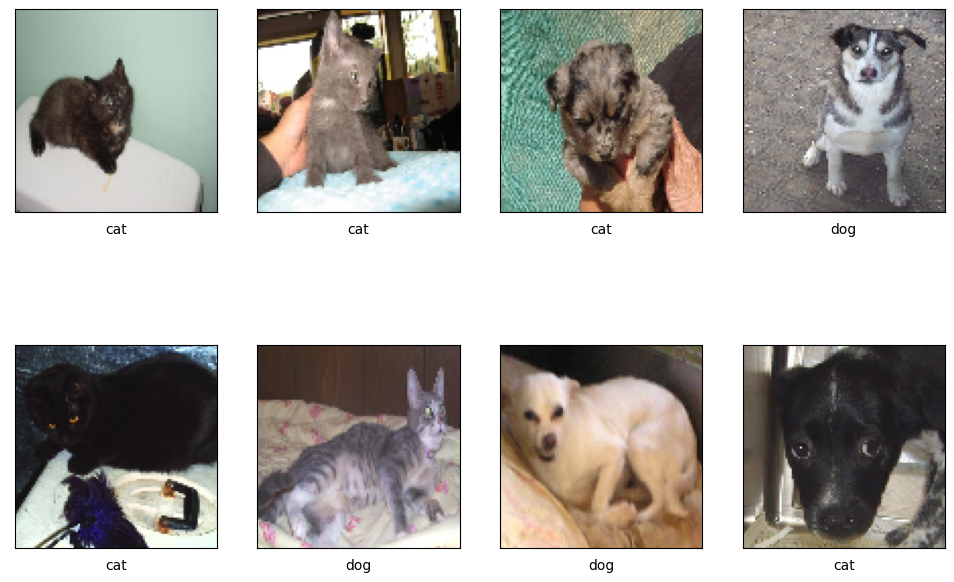

In [11]:
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_g))
pred = md.predict(validation)
pred = np.argmax(pred, axis = 1)

pt.figure(figsize = (12, 8))

for i in range(8):
    
    pt.subplot(2, 4, i+1)
    pt.imshow(validation[i])
    pt.xticks(ticks = [])
    pt.yticks(ticks = [])
    
    pt.xlabel(class_names[pred[i]])